In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putriadinda19","key":"310c0732614630b0481f48dd01562b1f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
100% 584M/586M [00:30<00:00, 22.5MB/s]
100% 586M/586M [00:30<00:00, 19.9MB/s]


In [4]:
!mkdiranimal-animals10
!unzip animals10.zip -d animals10
!ls animals10

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: animals10/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: animals10/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: animals10/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: animals10/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: animals10/raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: animals10/raw-img/ragno/OIP-

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import efficientnet_v2_m, EfficientNet_V2_M_Weights
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go
import plotly.express as px

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

100%|██████████| 586M/586M [00:27<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [7]:
dataset_path = os.path.join(path, "/content/animals10/raw-img")
labels_file = os.path.join(path, "/content/animals10/translate.py")

In [8]:
with open(labels_file, ) as f:
    animal_names = f.read().split()

In [9]:
animal_names[:10]

['translate',
 '=',
 '{"cane":',
 '"dog",',
 '"cavallo":',
 '"horse",',
 '"elefante":',
 '"elephant",',
 '"farfalla":',
 '"butterfly",']

In [10]:
import os

# Periksa apakah jalur utama dataset ada
dataset_path = '/content/animals10/raw-img'
if os.path.exists(dataset_path):
    print("Jalur dataset ditemukan:", dataset_path)
    print("Isi folder dataset:", os.listdir(dataset_path))
else:
    print("Jalur dataset tidak ditemukan:", dataset_path)


Jalur dataset ditemukan: /content/animals10/raw-img
Isi folder dataset: ['elefante', 'mucca', 'gallina', 'cavallo', 'scoiattolo', 'pecora', 'ragno', 'farfalla', 'cane', 'gatto']


In [11]:
# Periksa struktur folder dataset
for root, dirs, files in os.walk('/content/animals10'):
    print(f"Folder: {root}, Subfolder: {dirs}, File: {files}")


Folder: /content/animals10, Subfolder: ['raw-img'], File: ['translate.py']
Folder: /content/animals10/raw-img, Subfolder: ['elefante', 'mucca', 'gallina', 'cavallo', 'scoiattolo', 'pecora', 'ragno', 'farfalla', 'cane', 'gatto'], File: []
Folder: /content/animals10/raw-img/elefante, Subfolder: [], File: ['OIP-D7pA86GIpJ-6HfwvEol41AHaFj.jpeg', 'eb35b20a2cfc003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg', 'OIP-lxIx40H33wkW-GMep2LjMQHaEK.jpeg', 'OIP-StmJ8r9yCzlrk_1piXTBYAHaJ4.jpeg', 'OIP-DBJVW9Y8E6KinOUFQTVvKgHaE6.jpeg', 'OIP-bX4cuv2oXvsBTLRW58VTOAHaEK.jpeg', 'OIP-R2In4-qUYTJ5SGb81sELeQHaFY.jpeg', 'OIP-39Qt3kOUU1jXVGBukDIqCQHaFE.jpeg', 'OIP-bB9qEp-O6qTbFzdOOKgfdgHaEb.jpeg', 'OIP-bVpUMZ7PRS9W-lXrqrHUDQHaDT.jpeg', 'OIP-2Mhonm4StO-gng99CnkyDQHaE8.jpeg', 'OIP-3_EMK0EK-LEWN-JS34JtNgHaE7.jpeg', 'OIP-QMyCWVkABWIYPcW3ypbRtgHaFj.jpeg', 'OIP-7nQM7yTnjxF--RBHymKZ3gHaLJ.jpeg', 'OIP-pQJWiRzclYUUS9PuJU-lIwHaGq.jpeg', 'OIP-U3tWPnZygWN6UNwU1HRd2gHaE7.jpeg', 'OIP-X-a3t3aeF084JmlQz1D5tgHaHT.jp

In [12]:
# Daftar nama folder yang tersedia
available_folders = os.listdir(dataset_path)

# Daftar nama hewan yang dicari
animal_names = ['ragno', 'cane', 'cavallo', 'elefante', 'scoiattolo', 'farfalla', 'gallina', 'mucca', 'pecora', 'gatto']  # Ganti dengan nama sebenarnya

# Cocokkan
for animal in animal_names:
    if animal in available_folders:
        print(f"Folder '{animal}' ditemukan.")
    else:
        print(f"Folder '{animal}' TIDAK ditemukan. Apakah nama ini benar?")


Folder 'ragno' ditemukan.
Folder 'cane' ditemukan.
Folder 'cavallo' ditemukan.
Folder 'elefante' ditemukan.
Folder 'scoiattolo' ditemukan.
Folder 'farfalla' ditemukan.
Folder 'gallina' ditemukan.
Folder 'mucca' ditemukan.
Folder 'pecora' ditemukan.
Folder 'gatto' ditemukan.


In [13]:
# Periksa jalur lengkap untuk setiap nama hewan
for animal in animal_names:
    animal_path = os.path.join(dataset_path, animal)
    if os.path.exists(animal_path):
        print(f"Folder '{animal_path}' ditemukan.")
    else:
        print(f"Folder '{animal_path}' TIDAK ditemukan.")


Folder '/content/animals10/raw-img/ragno' ditemukan.
Folder '/content/animals10/raw-img/cane' ditemukan.
Folder '/content/animals10/raw-img/cavallo' ditemukan.
Folder '/content/animals10/raw-img/elefante' ditemukan.
Folder '/content/animals10/raw-img/scoiattolo' ditemukan.
Folder '/content/animals10/raw-img/farfalla' ditemukan.
Folder '/content/animals10/raw-img/gallina' ditemukan.
Folder '/content/animals10/raw-img/mucca' ditemukan.
Folder '/content/animals10/raw-img/pecora' ditemukan.
Folder '/content/animals10/raw-img/gatto' ditemukan.


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
animal_counts = {animal: len(os.listdir(os.path.join(dataset_path, animal))) for animal in animal_names}
animal_counts_df = pd.DataFrame(list(animal_counts.items()), columns=['Animal', 'Count'])
animal_counts_df = animal_counts_df.sort_values(by='Count', ascending=False)

fig = px.bar(animal_counts_df, x='Animal', y='Count', title='Distribution of Animal Classes', labels={'Animal': 'Animal', 'Count': 'Number of Images'},
             color='Count', color_continuous_scale='Viridis', template='plotly_dark')

fig.update_layout(title_font_size=24, title_x=0.5, xaxis_title_font_size=18, yaxis_title_font_size=18, font=dict(family="Arial, sans-serif", size=14))
fig.show()

In [16]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # training loop
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad() # Reset the gradients from the previous step
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward() # Calculating gradients
            optimizer.step() # Update model parameters based on gradients
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0) # Multiply by the mini-batch size
            correct_predictions += torch.sum(preds == labels) # getting the number of correct predictions
            total_predictions += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset) # Average loss per epoch
        epoch_acc = correct_predictions.double() / total_predictions # accuracy

        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")

        # validation loop
        model.eval()
        val_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0

        with torch.no_grad(): # turn off gradients for the validation evaluation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct_predictions += torch.sum(preds == labels)
                val_total_predictions += labels.size(0)

        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct_predictions.double() / val_total_predictions
        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}\n")

    print("Training complete.")

In [17]:
def visualize_predictions(model, dataset, num_images=10):
    model.eval()
    images_shown = 0
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for idx in random.sample(range(len(dataset)), num_images):
        img, label = dataset[idx] # Get image and true label
        inputs = img.unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # using softmax to obtain probabilities
            confidence, preds = torch.max(probs, 1)

        img = img.permute(1, 2, 0).numpy() # Convert to (H, W, C) format (height, width, channel)
        img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406] # reverse normalisation
        img = img.clip(0, 1)

        ax = axes[images_shown]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"True: {dataset.classes[label]}\n"
                    f"Pred: {dataset.classes[preds.item()]}\n"
                    f"Conf: {confidence.item() * 100:.2f}%")

        images_shown += 1

    plt.tight_layout()
    plt.show()

In [18]:
train_dir = "/content/animals10/raw-img"
test_dir = "/content/animals10/raw-img"

transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resizing images
    transforms.ToTensor(), # Converting images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(test_dir, transform=transform)
# Creating a DataLoader for batch loading of data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"class: {train_dataset.classes}")
print(f"jumlah class: {len(train_dataset.classes)}")

class: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
jumlah class: 10


In [19]:
weights = EfficientNet_V2_M_Weights.IMAGENET1K_V1
model = efficientnet_v2_m(weights=weights) # loading the model
# let's change the last layer
num_classes = len(train_dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [00:01<00:00, 161MB/s]


In [20]:
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

Epoch 1/10
------------------------------
Training Loss: 0.5178, Training Accuracy: 0.8403
Validation Loss: 0.3835, Validation Accuracy: 0.8789

Epoch 2/10
------------------------------
Training Loss: 0.3012, Training Accuracy: 0.9043
Validation Loss: 3.3075, Validation Accuracy: 0.7966

Epoch 3/10
------------------------------
Training Loss: 0.2280, Training Accuracy: 0.9274
Validation Loss: 4.2772, Validation Accuracy: 0.8200

Epoch 4/10
------------------------------
Training Loss: 0.1873, Training Accuracy: 0.9414
Validation Loss: 0.1249, Validation Accuracy: 0.9610

Epoch 5/10
------------------------------
Training Loss: 0.1767, Training Accuracy: 0.9425
Validation Loss: 0.0923, Validation Accuracy: 0.9716

Epoch 6/10
------------------------------
Training Loss: 0.1470, Training Accuracy: 0.9528
Validation Loss: 0.0916, Validation Accuracy: 0.9729

Epoch 7/10
------------------------------
Training Loss: 0.1179, Training Accuracy: 0.9617
Validation Loss: 0.0909, Validation Acc

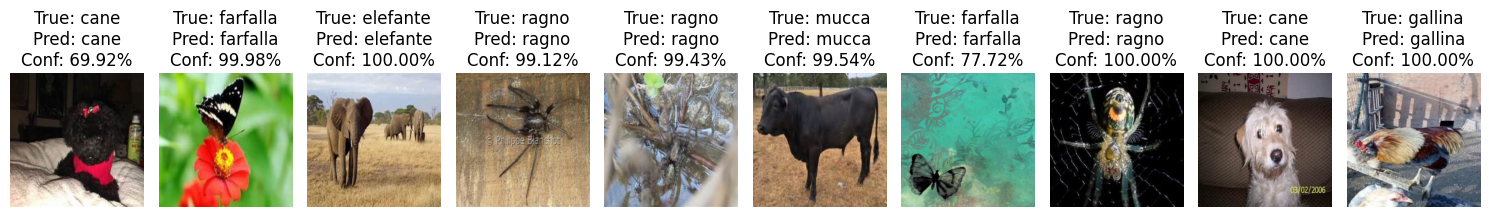

In [21]:
visualize_predictions(model, val_dataset)

In [27]:
torch.save(model.state_dict(), "/content/H5/animal.pth")